In [14]:
%matplotlib inline
from astropy.io import ascii, fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
c = const.c.cgs.value

### Read in original CDF archive products

In [24]:
# 1-D spectra
pacs_cdf = ascii.read('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt')
spire_cdf = ascii.read('/Users/yaolun/bhr71/fitting/BHR71/spire/data/BHR71_spire_corrected.txt')
# pacs_b1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b1_cdf_'+name+'.txt', data_start=4)
# pacs_b2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_b2_cdf_'+name+'.txt', data_start=4)
# pacs_r1_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r1_cdf_'+name+'.txt', data_start=4)
# pacs_r2_cdf = ascii.read('/Users/yaolun/bhr71/calibration_testing/corrected_spec_r2_cdf_'+name+'.txt', data_start=4)

pacs_weight = ascii.read('/Users/yaolun/bhr71/calibration_testing/HSA/pacs_weighted_318aper.txt')
spire_makiwa = ascii.read('/Users/yaolun/bhr71/calibration_testing/spire_sect_makiwa.txt', data_start=4)

# FITS
spire = fits.open('/Users/yaolun/bhr71/calibration_testing/HSA/bhr71_spire_point_apod.fits')
slw = [c/1e5/spire[5].data.field(0), spire[5].data.field(1)]
ssw = [c/1e5/spire[18].data.field(0), spire[18].data.field(1)]

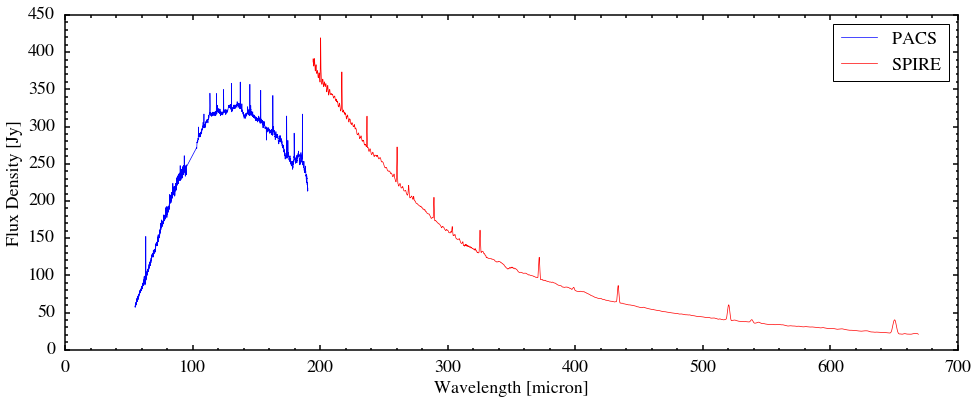

In [4]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

pacs, = ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux(Jy)'], 'b-', linewidth=0.7)
spire, = ax.plot(spire_cdf['Wavelength(um)'], spire_cdf['Flux(Jy)'], 'r-', linewidth=0.7)


ax.legend([pacs, spire], [r'$\rm{PACS}$', r'$\rm{SPIRE}$']
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 450])

fig.savefig('/Users/yaolun/test/bhr71_cdf.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

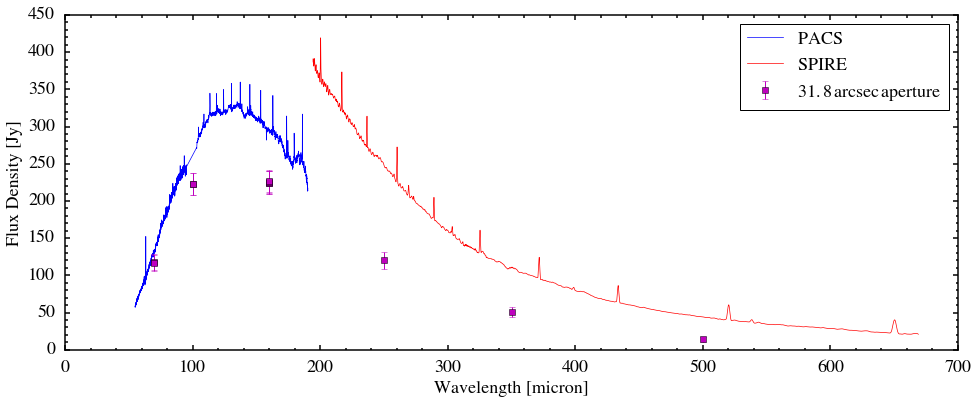

In [38]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

pacs, = ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux(Jy)'], 'b-', linewidth=0.7)
spire, = ax.plot(spire_cdf['Wavelength(um)'], spire_cdf['Flux(Jy)'], 'r-', linewidth=0.7)

# photometry
phot = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,120.18,50.66,14.02],
                   yerr=[10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75],
                   marker='s', color='m', linestyle='None')

ax.legend([pacs, spire, phot], [r'$\rm{PACS}$', r'$\rm{SPIRE}$', r'$\rm{31.8\,arcsec\,aperture}$']
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 450])

fig.savefig('/Users/yaolun/test/bhr71_cdf_phot.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

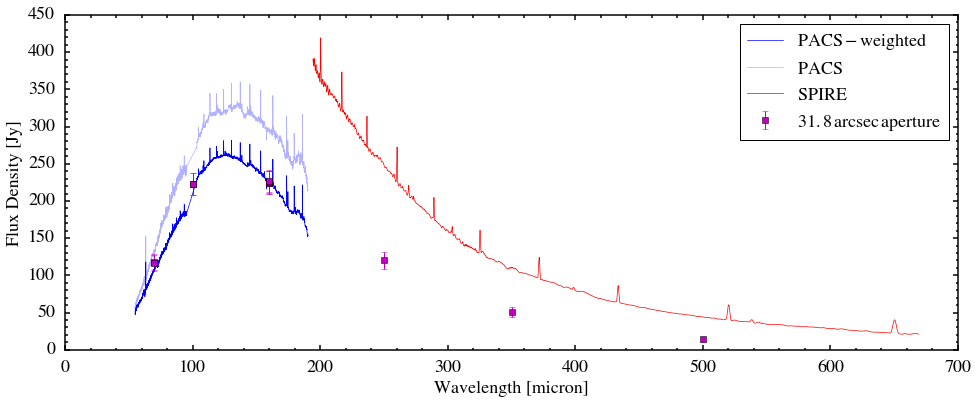

In [13]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

pacs, = ax.plot(pacs_cdf['Wavelength(um)'], pacs_cdf['Flux(Jy)'], 'b-', linewidth=0.7, alpha=0.3)
pacs_w, = ax.plot(pacs_weight['Wavelength(um)'], pacs_weight['Flux(Jy)'], 'b-', linewidth=0.7)
spire, = ax.plot(spire_cdf['Wavelength(um)'], spire_cdf['Flux(Jy)'], 'r-', linewidth=0.7)

# photometry
phot = ax.errorbar([70,70,100,100,160,160,160,160,250,350,500],
                   [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98,120.18,50.66,14.02],
                   yerr=[10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07,10.96,7.12,3.75],
                   marker='s', color='m', linestyle='None')

ax.legend([pacs_w, pacs, spire, phot],
          [r'$\rm{PACS-weighted}$', r'$\rm{PACS}$', r'$\rm{SPIRE}$', r'$\rm{31.8\,arcsec\,aperture}$']
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_ylim([0, 450])

fig.savefig('/Users/yaolun/test/bhr71_cdf_phot_pacs_weight.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

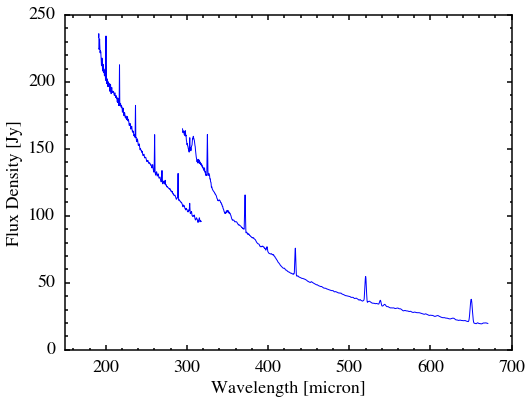

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

spire_hsa, = ax.plot(slw[0], slw[1], color='b', linestyle='-', linewidth=1)
ax.plot(ssw[0], ssw[1], color='b', linestyle='-', linewidth=1)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_xlim([150, 700])

fig.savefig('/Users/yaolun/test/bhr71_spire_modules.pdf',
            format='pdf', dpi=300, bbox_inches='tight')

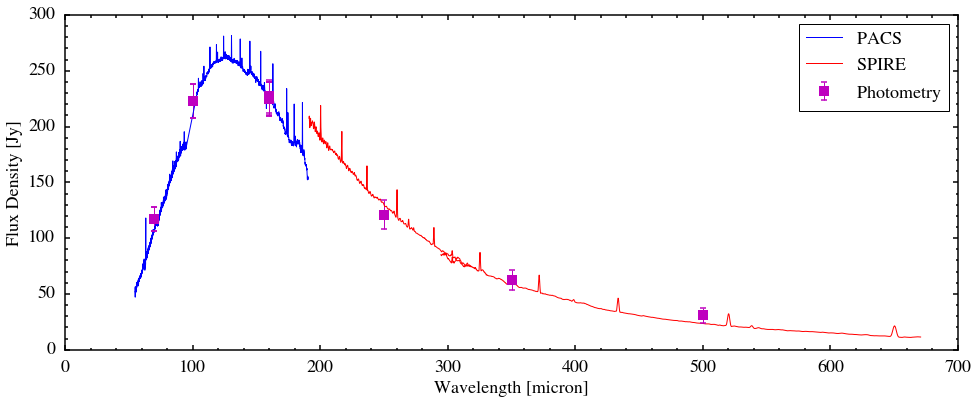

In [39]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

pacs, = ax.plot(pacs_weight['Wavelength(um)'], pacs_weight['Flux(Jy)'], 'b-', linewidth=1)
spire, = ax.plot(spire_makiwa['wave_segm1_0'], spire_makiwa['flux_segm1_0'], linewidth=1, color='r')
ax.plot(spire_makiwa['wave_segm2_0'], spire_makiwa['flux_segm2_0'], linewidth=1, color='r')
ax.errorbar([250,350,500],[121.019,62.392,30.9], yerr=[12.92,9.086,6.616],
            marker='s', color='m', linestyle='None', markersize=10, markeredgewidth=1.5, mec='None')
# photometry
phot = ax.errorbar([70,70,100,100,160,160,160,160],
                   [117.45,117.01,222.83,222.77,224.77,224.75,225.26,226.98],
                   yerr=[10.84,10.82,14.93,14.93,14.99,14.99,15.01,15.07],
                   marker='s', color='m', linestyle='None', markersize=10, markeredgewidth=1.5, mec='None')

ax.legend([pacs, spire, phot],
          [r'$\rm{PACS}$', r'$\rm{SPIRE}$', r'$\rm{Photometry}$']
          , fontsize=18, numpoints=1)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Wavelength [micron]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)

fig.savefig('/Users/yaolun/test/bhr71_best_calibrated.pdf',
            format='pdf', dpi=300, bbox_inches='tight')